<a href="https://colab.research.google.com/github/Bolla-kaseeswari00/Bolla-kaseeswari00/blob/main/SALARYPREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset=pd.read_csv(r"Salary.csv")

In [ ]:
dataset.shape

(35, 2)

In [ ]:
print(len(dataset))

35


In [ ]:
dataset.tail(10)

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872
30,11.2,127345
31,11.5,126756
32,12.3,128765
33,12.9,135675
34,13.5,139465


In [ ]:
dataset.head(10)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
data = pd.read_csv("Salary.csv")
print(len(data))
data.head(19)

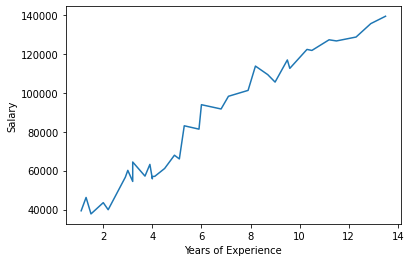

In [ ]:
plt.plot(dataset['YearsExperience'],dataset['Salary'])
plt.xlabel('Years of Experience');
plt.ylabel("Salary");

In [ ]:
X = dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values


In [ ]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [11.2],
       [11.5],
       [12.3],
       [12.9],
       [13.5]])

In [ ]:
Y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872, 127345, 126756,
       128765, 135675, 139465])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3,random_state=101)

In [ ]:
X_train


In [ ]:
Y_train

array([ 66029,  63218,  43525,  46205, 101302,  56957,  56642,  61111,
        39343,  98273, 109431,  39891,  64445,  57081,  57189,  67938,
       135675, 121872, 113812,  60150,  83088,  55794, 126756])

In [ ]:
X_test

In [ ]:
Y_test

In [ ]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [ ]:
LR.fit(X_train,Y_train);

In [ ]:
Y_pred_LR=LR.predict(X_test)

In [ ]:
X_test

array([[ 5.9],
       [ 3.2],
       [ 6.8],
       [13.5],
       [11.2],
       [ 9.5],
       [ 9. ],
       [ 9.6],
       [12.3],
       [ 1.5],
       [10.3],
       [ 6. ]])

In [ ]:
Y_test

In [ ]:
Y_pred_LR

In [ ]:
diff_LR=Y_test-Y_pred_LR

In [ ]:
res_df=pd.concat([pd.Series(Y_pred_LR),pd.Series(Y_test),pd.Series(diff_LR)],axis=1)
res_df.columns=['Prediction','Original Data','Diff']

In [ ]:
res_df

In [ ]:
plt.scatter(X_train,Y_train,color='blue')
plt.plot(X_train,LR.predict(X_train),color='red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.savefig(r'D:\Python37\Years of Experience.png')
plt.show()

In [ ]:
plt.scatter(X_test,Y_test,color='blue')
plt.plot(X_train,LR.predict(X_train),color='red')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()

In [ ]:
from sklearn import metrics
rmse= np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_LR))
Accuracy=metrics.r2_score(Y_test,Y_pred_LR)

In [ ]:
rmse

In [ ]:
Accuracy

In [ ]:
LR.predict([[17]])

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DT=DecisionTreeRegressor()

In [ ]:
DT.fit(X_train,Y_train);

In [ ]:
Y_pred_dt=DT.predict(X_test)

In [ ]:
Y_pred_dt

In [ ]:
Y_test

In [ ]:
diff_DT=Y_test-Y_pred_dt

In [ ]:
res_dt=pd.concat([pd.Series(Y_pred_dt),pd.Series(Y_test),pd.Series(diff_DT)],axis=1)
res_dt.columns=['Prediction','Original Data','Diff']

In [ ]:
res_dt

In [ ]:
X_test

In [ ]:
from sklearn import metrics
rmse= np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_dt))
R2=metrics.r2_score(Y_test,Y_pred_dt)

In [ ]:
rmse

In [ ]:
R2

In [ ]:
from sklearn import tree

In [ ]:
text_representation=tree.export_text(DT);
print(text_representation);

In [ ]:
fig=plt.figure(figsize=(25,20))
_=tree.plot_tree(DT,feature_names=dataset['YearsExperience'],filled=True)